In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Trabajo final\CreditoHipotecario.dta"

df, meta = st.read_dta(path)
df.head(1)

,seq,s3,s4,s5,s6,s7,s9,s11,s13,s14,s15,s16,s17,s18,s19a,s19b,s19c,s19d,s20,s23a,s24a,s25a,s26a,s27a,s30a,s30c,s31a,s31c,s32,s33,s34,s35,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,netw,uria,rtdum,bd,mi,old,vr,school,chval,dnotown,dprop,deny,pi_ratio,black,hse_inc,loan_val,ccred,mcred,pubrec,denpmi,selfemp,married,single,hischl,probunmp,condo
0,2.0,1.0,1.0,1.0,88.0,1.0,1120.0,0.0,5.0,5.0,2.0,1.0,53.0,8.0,NA,NA,NA,NA,1.0,M,0.0,19.0,19.0,0.0,1938.0,2000.0,2241.0,2000.0,939.0,110.0,0.0,30.0,0.0,0.0,34.0,2.0,5.0,0.0,22.1,22.1,3.0,360.0,NA,110.0,2.0,0.0,0.0,N,0.0,1.0,999999.375,92.0,3.9,0.0,1.0,1.0,1.0,0.0,15.0,206.735489,0.0,0.0,0.0,0.221,0.0,0.221,0.8,5.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,3.9,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq       2380 non-null   float64
 1   s3        2380 non-null   float64
 2   s4        2380 non-null   float64
 3   s5        2380 non-null   float64
 4   s6        2380 non-null   float64
 5   s7        2380 non-null   float64
 6   s9        2380 non-null   float64
 7   s11       2380 non-null   float64
 8   s13       2380 non-null   float64
 9   s14       2379 non-null   float64
 10  s15       2380 non-null   float64
 11  s16       2379 non-null   float64
 12  s17       2380 non-null   float64
 13  s18       2265 non-null   float64
 14  s19a      2380 non-null   object 
 15  s19b      2380 non-null   object 
 16  s19c      2380 non-null   object 
 17  s19d      2380 non-null   object 
 18  s20       2380 non-null   float64
 19  s23a      2380 non-null   object 
 20  s24a      2380 non-null   floa

In [26]:
df[['deny', 'pi_ratio', 'black']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   deny      2380 non-null   float64
 1   pi_ratio  2380 non-null   float64
 2   black     2380 non-null   float64
dtypes: float64(3)
memory usage: 55.9 KB


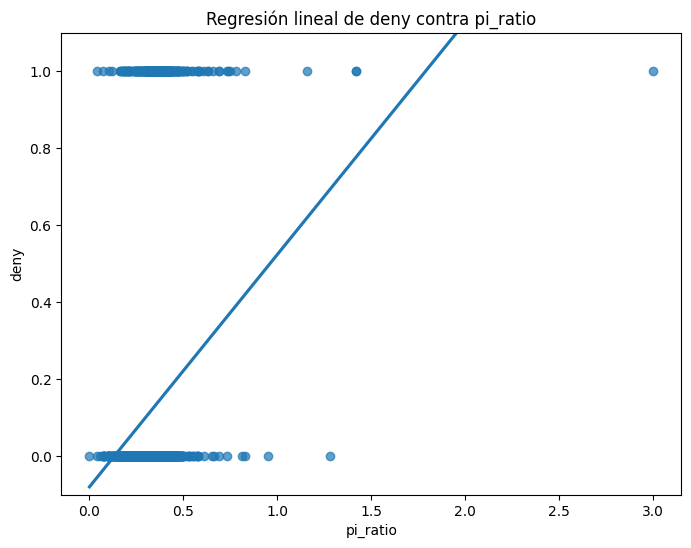

In [22]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='pi_ratio', y='deny', data=df, ci=None, scatter_kws={'alpha': 0.7})

# Personalización
plt.xlabel('pi_ratio')
plt.ylabel('deny')
plt.title('Regresión lineal de deny contra pi_ratio')

# Limitar el eje Y de 0 a 1
plt.ylim(-0.1, 1.1)

plt.show()

Si el modelo es una regresión lineal (OLS) y deny es binaria (0 o 1), el uso de este modelo no es ideal porque:

Puede predecir probabilidades fuera del rango [0,1]
No modela correctamente relaciones no lineales entre la variable independiente y la probabilidad de aprobación.

In [23]:
import statsmodels.api as sm

x = df['pi_ratio']
X = sm.add_constant(x)
y = df['deny']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     98.41
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           9.37e-23
Time:                        23:18:39   Log-Likelihood:                -651.42
No. Observations:                2380   AIC:                             1307.
Df Residuals:                    2378   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0799      0.021     -3.777      0.000      -0.121      -0.038
pi_ratio       0.6035      0.061      9.920      0.000       0.484       0.723
==============================================================================
Omnibus:                     1018.085   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3273.764
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x = df['pi_ratio']
X = np.stack([np.ones(x.shape[0]), x], axis=1)
y = df['deny']

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-0.07990964,  0.60353493])

In [25]:
x = df[['pi_ratio', 'black']]
X = sm.add_constant(x)
y = df['deny']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     97.76
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.58e-41
Time:                        23:20:29   Log-Likelihood:                -605.61
No. Observations:                2380   AIC:                             1217.
Df Residuals:                    2377   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.021     -4.354      0.000      -0.131      -0.050
pi_ratio       0.5592      0.060      9.340      0.000       0.442       0.677
black          0.1774      0.018      9.659      0.000       0.141       0.213
==============================================================================
Omnibus:                      969.841   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3013.280
Skew:                           2.168   Prob(JB):                         0.00
Kurtosis:                       6.403   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

significa que, manteniendo pi_ratio constante:
Ser black (black = 1) aumenta la probabilidad de aprobación del crédito en aproximadamente 0.177 en comparación con no serlo (black = 0).
Es decir, en igualdad de condiciones en pi_ratio, las personas identificadas como black tienen una mayor probabilidad de que su crédito sea aprobado.

In [29]:
logit_model = sm.Logit(y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.334326
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deny   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.08759
Time:                        23:25:42   Log-Likelihood:                -795.70
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 6.671e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1256      0.268    -15.370      0.000      -4.652      -3.599
pi_ratio       5.3704      0.728      7.374      0.000       3.943       6.798
black          1.2728      0.146      8.706      0.000       0.986       1.559
==============================================================================
"""

In [31]:
# Calcular los efectos marginales (mfx en Stata)
logit_margins = logit_model.get_margeff(at='mean')

# Mostrar los resultados de los efectos marginales
print(logit_margins.summary())

        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.4949      0.066      7.465      0.000       0.365       0.625
black          0.1173      0.013      8.859      0.000       0.091       0.143


In [32]:
# Calcular los efectos marginales (mfx en Stata)
logit_margins = logit_model.get_margeff()

# Mostrar los resultados de los efectos marginales
print(logit_margins.summary())

        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.5183      0.070      7.430      0.000       0.382       0.655
black          0.1228      0.014      8.791      0.000       0.095       0.150


In [30]:
probit_model = sm.Probit(y, X).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.334931
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   deny   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.08594
Time:                        23:25:59   Log-Likelihood:                -797.14
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.818e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2587      0.130    -17.391      0.000      -2.513      -2.004
pi_ratio       2.7416      0.360      7.624      0.000       2.037       3.446
black          0.7082      0.083      8.488      0.000       0.545       0.872
==============================================================================
"""

In [33]:
# Calcular los efectos marginales (mfx en Stata)
probit_margins = probit_model.get_margeff(at='mean')

# Mostrar los resultados de los efectos marginales
print(probit_margins.summary())

       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.5002      0.066      7.575      0.000       0.371       0.630
black          0.1292      0.015      8.465      0.000       0.099       0.159


Para una persona con un valor promedio de pi_ratio, el hecho de ser black aumenta la probabilidad de aprobación del crédito en aproximadamente 12.92 puntos porcentuales (0.1292) en comparación con no serlo, manteniendo constante el valor de pi_ratio.

Valor óptimo de k para que aproximadamente el 30% de y^* sea negativo: -0.4545454545454546


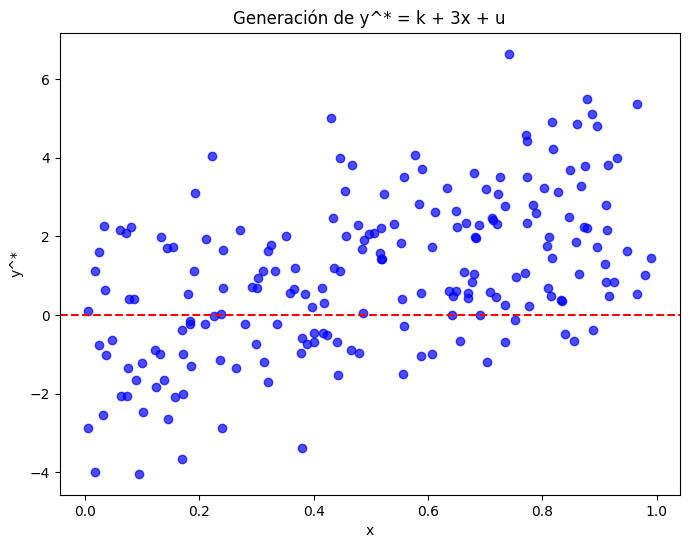

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 200 valores de x uniformemente distribuidos entre 0 y 1
n = 200
x = np.random.uniform(0, 1, n)

# Generar 200 valores de u de distribución normal N(0, 3)
u = np.random.normal(0, np.sqrt(3), n)

# Función para calcular y^* dado k
def generate_y_star(k, x, u):
    return k + 3 * x + u

# Probar diferentes valores de k para que el 30% de y^* sea negativo
k_values = np.linspace(-3, 3, 100)  # Rango de posibles valores de k
neg_percentage = []

for k in k_values:
    y_star = generate_y_star(k, x, u)
    neg_percentage.append(np.mean(y_star < 0))  # Porcentaje de valores negativos

# Elegir el valor de k que da un 30% de valores negativos
k_optimal = k_values[np.argmin(np.abs(np.array(neg_percentage) - 0.30))]

# Generar y^* con el valor óptimo de k
y_star = generate_y_star(k_optimal, x, u)

# Mostrar el valor óptimo de k
print(f'Valor óptimo de k para que aproximadamente el 30% de y^* sea negativo: {k_optimal}')

# Graficar el resultado
plt.figure(figsize=(8, 6))
plt.scatter(x, y_star, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Generación de y^* = k + 3x + u')
plt.xlabel('x')
plt.ylabel('y^*')
plt.show()

El valor de k que genera aproximadamente un 30.0% de valores negativos en y es: -0.5


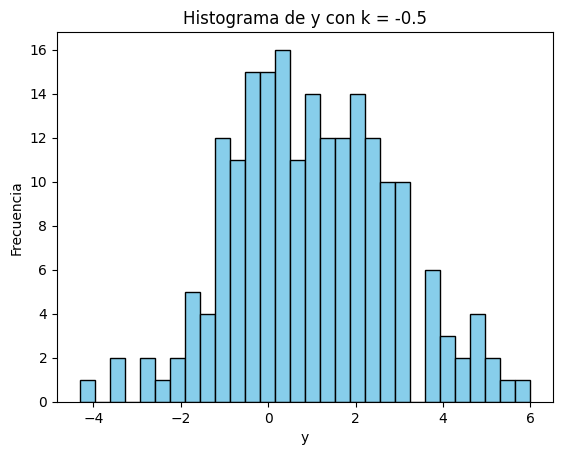

array([ 0.12195391, -1.64575223,  1.5252616 ,  2.08387583,  0.05019749,
       -0.06772919,  0.63585543, -0.12318898,  3.02082952,  4.91590334,
       -0.12031285,  2.10065108,  1.63855245,  2.81386196,  1.15646867,
        0.34167135, -0.43895794,  2.93364406,  1.44222797,  1.46099425,
        1.8355464 , -1.39025406,  2.27170094,  3.15823665,  3.59624253,
        1.95180645,  5.14086276,  3.92874819,  1.01301674,  1.5138254 ,
        3.09910494,  1.12216851,  4.72460655, -0.1592865 , -0.93335339,
       -0.98975601, -2.81085098,  1.5582093 ,  2.04277714, -1.14082625,
        1.76614824, -0.03604518,  1.91285848,  3.24419134, -0.80302327,
        3.97292249,  1.48873587, -2.06720715,  0.07720141, -0.9837874 ,
       -1.04284622,  2.99330378,  2.62126791,  2.54152451,  1.97354006,
        0.96918689,  1.66814017,  3.73360566, -0.56299861,  0.16500025,
       -0.96295842,  1.30486758,  2.02825476,  0.10699391, -0.44365197,
       -0.68896884, -3.39433932, -0.21643481,  0.80794219,  2.98

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_latent_variable(n=200, target_negative_proportion=0.30):
    k = 0  # Iniciar con un valor de k
    negative_proportion = 1.0  # Valor inicial para la proporción de valores negativos

    while abs(negative_proportion - target_negative_proportion) > 0.01:  # Condición de ajuste
        # Generar las variables
        x = np.random.uniform(0, 1, n)  # x ~ uniform[0, 1]
        u = np.random.normal(0, np.sqrt(3), n)  # u ~ N(0, 3)

        # Calcular y
        y = k + 3 * x + u
        
        # Proporción de y negativos
        negative_proportion = np.sum(y < 0) / n

        # Ajustar k según la proporción de negativos
        k -= 0.1  # Ajustar k en cada iteración (puedes hacer más fino el paso)

    print(f"El valor de k que genera aproximadamente un {target_negative_proportion*100}% de valores negativos en y es: {k}")

    # Mostrar histograma
    plt.hist(y, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de y con k = {k}")
    plt.xlabel('y')
    plt.ylabel('Frecuencia')
    plt.show()

    return y

# Llamar a la función
generate_latent_variable()

In [1]:
import numpy as np
import pandas as pd

def generate_latent_variable_df(n=2000, target_negative_proportion=0.30):
    k = 0  # Iniciar con un valor de k
    negative_proportion = 1.0  # Valor inicial para la proporción de valores negativos

    while abs(negative_proportion - target_negative_proportion) > 0.0001:  # Condición de ajuste
        # Generar las variables
        x = np.random.uniform(0, 1, n)  # x ~ uniform[0, 1]
        u = np.random.normal(0, np.sqrt(3), n)  # u ~ N(0, 3)

        # Calcular y
        y = k + 3 * x + u
        
        # Proporción de y negativos
        negative_proportion = np.sum(y < 0) / n

        # Ajustar k según la proporción de negativos
        k -= 0.1  # Ajustar k en cada iteración (puedes hacer más fino el paso)

    # Crear el DataFrame
    df = pd.DataFrame({
        'num_obs': np.arange(1, n + 1),
        'y': y,
        'k': k,
        'x': x,
        'u': u
    })

    df_t = df[df['y']>=0].copy()

    return df, df_t

# Llamar a la función y generar el DataFrame
df, df_t = generate_latent_variable_df()
df.head()

KeyboardInterrupt: 

In [16]:
df[df['y']<0].shape[0] / len(df)

0.292

In [17]:
df_t.head()

,num_obs,y,k,x,u
0,1,-1.763746,-0.5,0.169144,-1.871177
1,2,-2.010542,-0.5,0.072198,-1.827134
7,8,-0.350803,-0.5,0.258369,-0.725910
11,12,-1.760940,-0.5,0.200830,-1.963431
12,13,-1.350461,-0.5,0.007219,-0.972120


In [19]:
df[df['y']<0].shape[0]

584

In [18]:
df_t.shape[0]

584